In [1]:
from samap.mapping import SAMAP
from samap.analysis import (get_mapping_scores, GenePairFinder,
                            sankey_plot, chord_plot, CellTypeTriangles, 
                            ParalogSubstitutions, FunctionalEnrichment,
                            convert_eggnog_to_homologs, GeneTriangles)
from samalg import SAM
import pandas as pd
import scanpy as sc

/home/passala/miniconda3/envs/SAMap_fix_attempt/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
fn1 = '/home/passala/Temp_directory_for_reading_error_all_stuff_backed_up_if_MP_is_PhD_delete/GEO_sourced_single_cell_for_CRUSH/SAMMAP_stuff/rice_filtered_sc.h5ad'
fn2 = '/home/passala/Temp_directory_for_reading_error_all_stuff_backed_up_if_MP_is_PhD_delete/GEO_sourced_single_cell_for_CRUSH/SAMMAP_stuff/maize_filtered_sc.h5ad'

In [3]:
filenames = {'OS':fn1,'ZM':fn2}

In [4]:
A=pd.read_csv('/data/passala/Coexpressolog_paper_data/Sammap_files/blast_maps/maps/ZMOS/OS_to_ZM.txt',sep='\t',index_col=0,header=None)

In [5]:
A.head()

,1,2,3,4,5,6,7,8,9,10,11
0,,,,,,,,,,,
LOC_Os01g01010,Zm00001d040234,75.434,692,149,3,12,701,11,683,0.0,1073.0
LOC_Os01g01010,Zm00001d040234,75.434,692,149,3,12,701,11,683,0.0,1073.0
LOC_Os01g01010,Zm00001d040234,72.874,682,164,3,12,691,11,673,0.0,1015.0
LOC_Os01g01010,Zm00001d040234,74.772,658,145,3,12,667,11,649,0.0,1009.0
LOC_Os01g01010,Zm00001d040234,72.134,689,164,4,12,691,11,680,0.0,1007.0


In [6]:
sam1=SAM()
sam1.load_data(fn1)
sam2=SAM()
sam2.load_data(fn2)


In [7]:
sams = {'OS':sam1,'ZM':sam2}

sm = SAMAP(
        filenames,
        f_maps = '/data/passala/Coexpressolog_paper_data/Sammap_files/blast_maps/maps/',
    )

Processing data OS from:
/home/passala/Temp_directory_for_reading_error_all_stuff_backed_up_if_MP_is_PhD_delete/GEO_sourced_single_cell_for_CRUSH/SAMMAP_stuff/rice_filtered_sc.h5ad
RUNNING SAM
Iteration: 0, Convergence: 1.0
Iteration: 1, Convergence: 0.8681934312324614
Iteration: 2, Convergence: 0.013529693979814622
Computing the UMAP embedding...
Elapsed time: 24.297351837158203 seconds
Not updating the manifold...
Processing data ZM from:
/home/passala/Temp_directory_for_reading_error_all_stuff_backed_up_if_MP_is_PhD_delete/GEO_sourced_single_cell_for_CRUSH/SAMMAP_stuff/maize_filtered_sc.h5ad
RUNNING SAM
Iteration: 0, Convergence: 1.0
Iteration: 1, Convergence: 0.9333974234442851
Computing the UMAP embedding...
Elapsed time: 13.946604251861572 seconds
Not updating the manifold...
25715 `OS` gene symbols match between the datasets and the BLAST graph.
31319 `ZM` gene symbols match between the datasets and the BLAST graph.


In [8]:
ids = list(filenames.keys())
ids

['OS', 'ZM']

In [9]:
# ids = ids
# f_maps = '/data/passala/Coexpressolog_paper_data/Sammap_files/blast_maps/maps/'
# eval_thr=1e-6
# reciprocate=False
# gns = []
# Xs=[]
# Ys=[]
# Vs=[]

# for i in range(len(ids)):
#     id1=ids[i]
#     for j in range(i,len(ids)):
#         id2=ids[j]
#         if i!=j:
#             if os.path.exists(f_maps + "{}{}".format(id1, id2)):
#                 fA = f_maps + "{}{}/{}_to_{}.txt".format(id1, id2, id1, id2)
#                 fB = f_maps + "{}{}/{}_to_{}.txt".format(id1, id2, id2, id1)
#             elif os.path.exists(f_maps + "{}{}".format(id2, id1)):
#                 fA = f_maps + "{}{}/{}_to_{}.txt".format(id2, id1, id1, id2)
#                 fB = f_maps + "{}{}/{}_to_{}.txt".format(id2, id1, id2, id1)
#             else:
#                 raise FileExistsError(
#                     "BLAST mapping tables with the input IDs ({} and {}) not found in the specified path.".format(
#                         id1, id2
#                     )
#                 )

#             A = pd.read_csv(fA, sep="\t", header=None, index_col=0)
#             B = pd.read_csv(fB, sep="\t", header=None, index_col=0)



#             A.columns = A.columns.astype("<U100")
#             B.columns = B.columns.astype("<U100")

#             A = A[A.index.astype("str") != "nan"]
#             A = A[A.iloc[:, 0].astype("str") != "nan"]
#             B = B[B.index.astype("str") != "nan"]
#             B = B[B.iloc[:, 0].astype("str") != "nan"]

#             A.index = A.index.astype('str')#### THESE TWO LINES FIX THE CODE PAY ATTENTION HERE
#             ### PAY ATTENTION HERE
#             B.index = B.index.astype('str')

#             A.index = _prepend_blast_prefix(A.index,id1)
#             B[B.columns[0]] = _prepend_blast_prefix(B.iloc[:, 0].values.flatten(),id1)

#             B.index = _prepend_blast_prefix(B.index,id2)
#             A[A.columns[0]] = _prepend_blast_prefix(A.iloc[:, 0].values.flatten(),id2)

#             i1 = np.where(A.columns == "10")[0][0]
#             i3 = np.where(A.columns == "11")[0][0]

#             inA = q(A.index)
#             inB = q(B.index)

#             inA2 = q(A.iloc[:, 0])
#             inB2 = q(B.iloc[:, 0])
#             gn1 = np.unique(np.append(inB2, inA))
#             gn2 = np.unique(np.append(inA2, inB))
#             gn = np.append(gn1, gn2)
#             gnind = pd.DataFrame(data=np.arange(gn.size)[None, :], columns=gn)

#             A.index = pd.Index(gnind[A.index].values.flatten())
#             B.index = pd.Index(gnind[B.index].values.flatten())
#             A[A.columns[0]] = gnind[A.iloc[:, 0].values.flatten()].values.flatten()
#             B[B.columns[0]] = gnind[B.iloc[:, 0].values.flatten()].values.flatten()

#             Arows = np.vstack((A.index, A.iloc[:, 0], A.iloc[:, i3])).T
#             Arows = Arows[A.iloc[:, i1].values.flatten() <= eval_thr, :]
#             gnnm1 = sp.sparse.lil_matrix((gn.size,) * 2)
#             gnnm1[Arows[:, 0].astype("int32"), Arows[:, 1].astype("int32")] = Arows[
#                 :, 2
#             ]  # -np.log10(Arows[:,2]+1e-200)

#             Brows = np.vstack((B.index, B.iloc[:, 0], B.iloc[:, i3])).T
#             Brows = Brows[B.iloc[:, i1].values.flatten() <= eval_thr, :]
#             gnnm2 = sp.sparse.lil_matrix((gn.size,) * 2)
#             gnnm2[Brows[:, 0].astype("int32"), Brows[:, 1].astype("int32")] = Brows[
#                 :, 2
#             ]  # -np.log10(Brows[:,2]+1e-200)

#             gnnm = (gnnm1 + gnnm2).tocsr()
#             gnnms = (gnnm + gnnm.T) / 2
#             if reciprocate:
#                 gnnm.data[:] = 1
#                 gnnms = gnnms.multiply(gnnm).multiply(gnnm.T).tocsr()
#             gnnm = gnnms

#             f1 = np.where(np.in1d(gn,gn1))[0]
#             f2 = np.where(np.in1d(gn,gn2))[0]
#             f = np.append(f1,f2)
#             gn = gn[f]
#             gnnm = gnnm[f,:][:,f]
            
#             V = gnnm.data
#             X,Y = gnnm.nonzero()
            
#             Xs.extend(gn[X])
#             Ys.extend(gn[Y])
#             Vs.extend(V)
#             gns.extend(gn)


In [9]:
sm.run()
samap = sm.samap # SAM object with three species stitched together

Prepping datasets for translation.
Translating feature spaces pairwise.
Projecting data into joint latent space. 0.25705909729003906
Correcting data with means. 1.2215006351470947
Expanding neighbourhoods of species OS...
Expanding neighbourhoods of species ZM...
Indegree coarsening
0/1 (0, 6332)
Rescaling edge weights by expression correlations.
Concatenating SAM objects...
Iteration 1 complete.
Alignment scores:
          OS       ZM
OS  0.000000  0.04531
ZM  0.037061  0.00000
Calculating gene-gene correlations in the homology graph...


TypingError: Failed in nopython mode pipeline (step: nopython frontend)
Failed in nopython mode pipeline (step: native lowering)
Cannot cast float64 to [unichr x 2]: double %"arg.key"
During: lowering "castedkey = call $2load_global.0(key, $6load_deref.2, func=$2load_global.0, args=[Var(key, dictobject.py:757), Var($6load_deref.2, dictobject.py:757)], kws=(), vararg=None, varkwarg=None, target=None)" at /home/passala/miniconda3/envs/SAMap_fix_attempt/lib/python3.10/site-packages/numba/typed/dictobject.py (757)
During: typing of intrinsic-call at /home/passala/miniconda3/envs/SAMap_fix_attempt/lib/python3.10/site-packages/samap/mapping.py (1477)

File "../../../../../home/passala/miniconda3/envs/SAMap_fix_attempt/lib/python3.10/site-packages/samap/mapping.py", line 1477:
def _refine_corr_kernel(p, ps, sids, sixs, indptr,indices,data, n, corr_mode):
    <source elided>
        a1, a2 = ps1[j], ps2[j]
        ix1 = d[a1]
        ^


Please create a projection first using run_umap orrun_tsne


UnboundLocalError: local variable 'dt' referenced before assignment

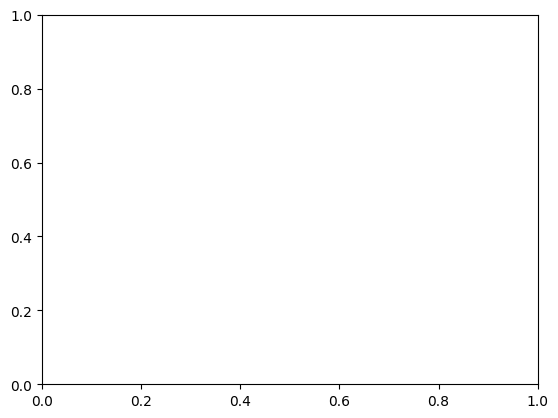

In [10]:
sm.scatter()